In [207]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


In [208]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [209]:
import warnings
warnings.filterwarnings('ignore')

In [210]:
data=pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')

In [211]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [213]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [214]:
df=data.copy()

In [215]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [216]:
cols=['Month','VisitorType','Weekend', 'Revenue']
for i in cols:
    print(i + ': ')
    print(df[i].unique())

Month: 
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
VisitorType: 
['Returning_Visitor' 'New_Visitor' 'Other']
Weekend: 
[False  True]
Revenue: 
[False  True]


In [217]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [218]:
for i in cols:
    df[i]=le.fit_transform(df[i])

In [219]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [220]:
for i in cols:
    print(i + ': ')
    print(df[i].unique())

Month: 
[2 5 6 8 4 3 0 7 9 1]
VisitorType: 
[2 0 1]
Weekend: 
[0 1]
Revenue: 
[0 1]


<AxesSubplot:>

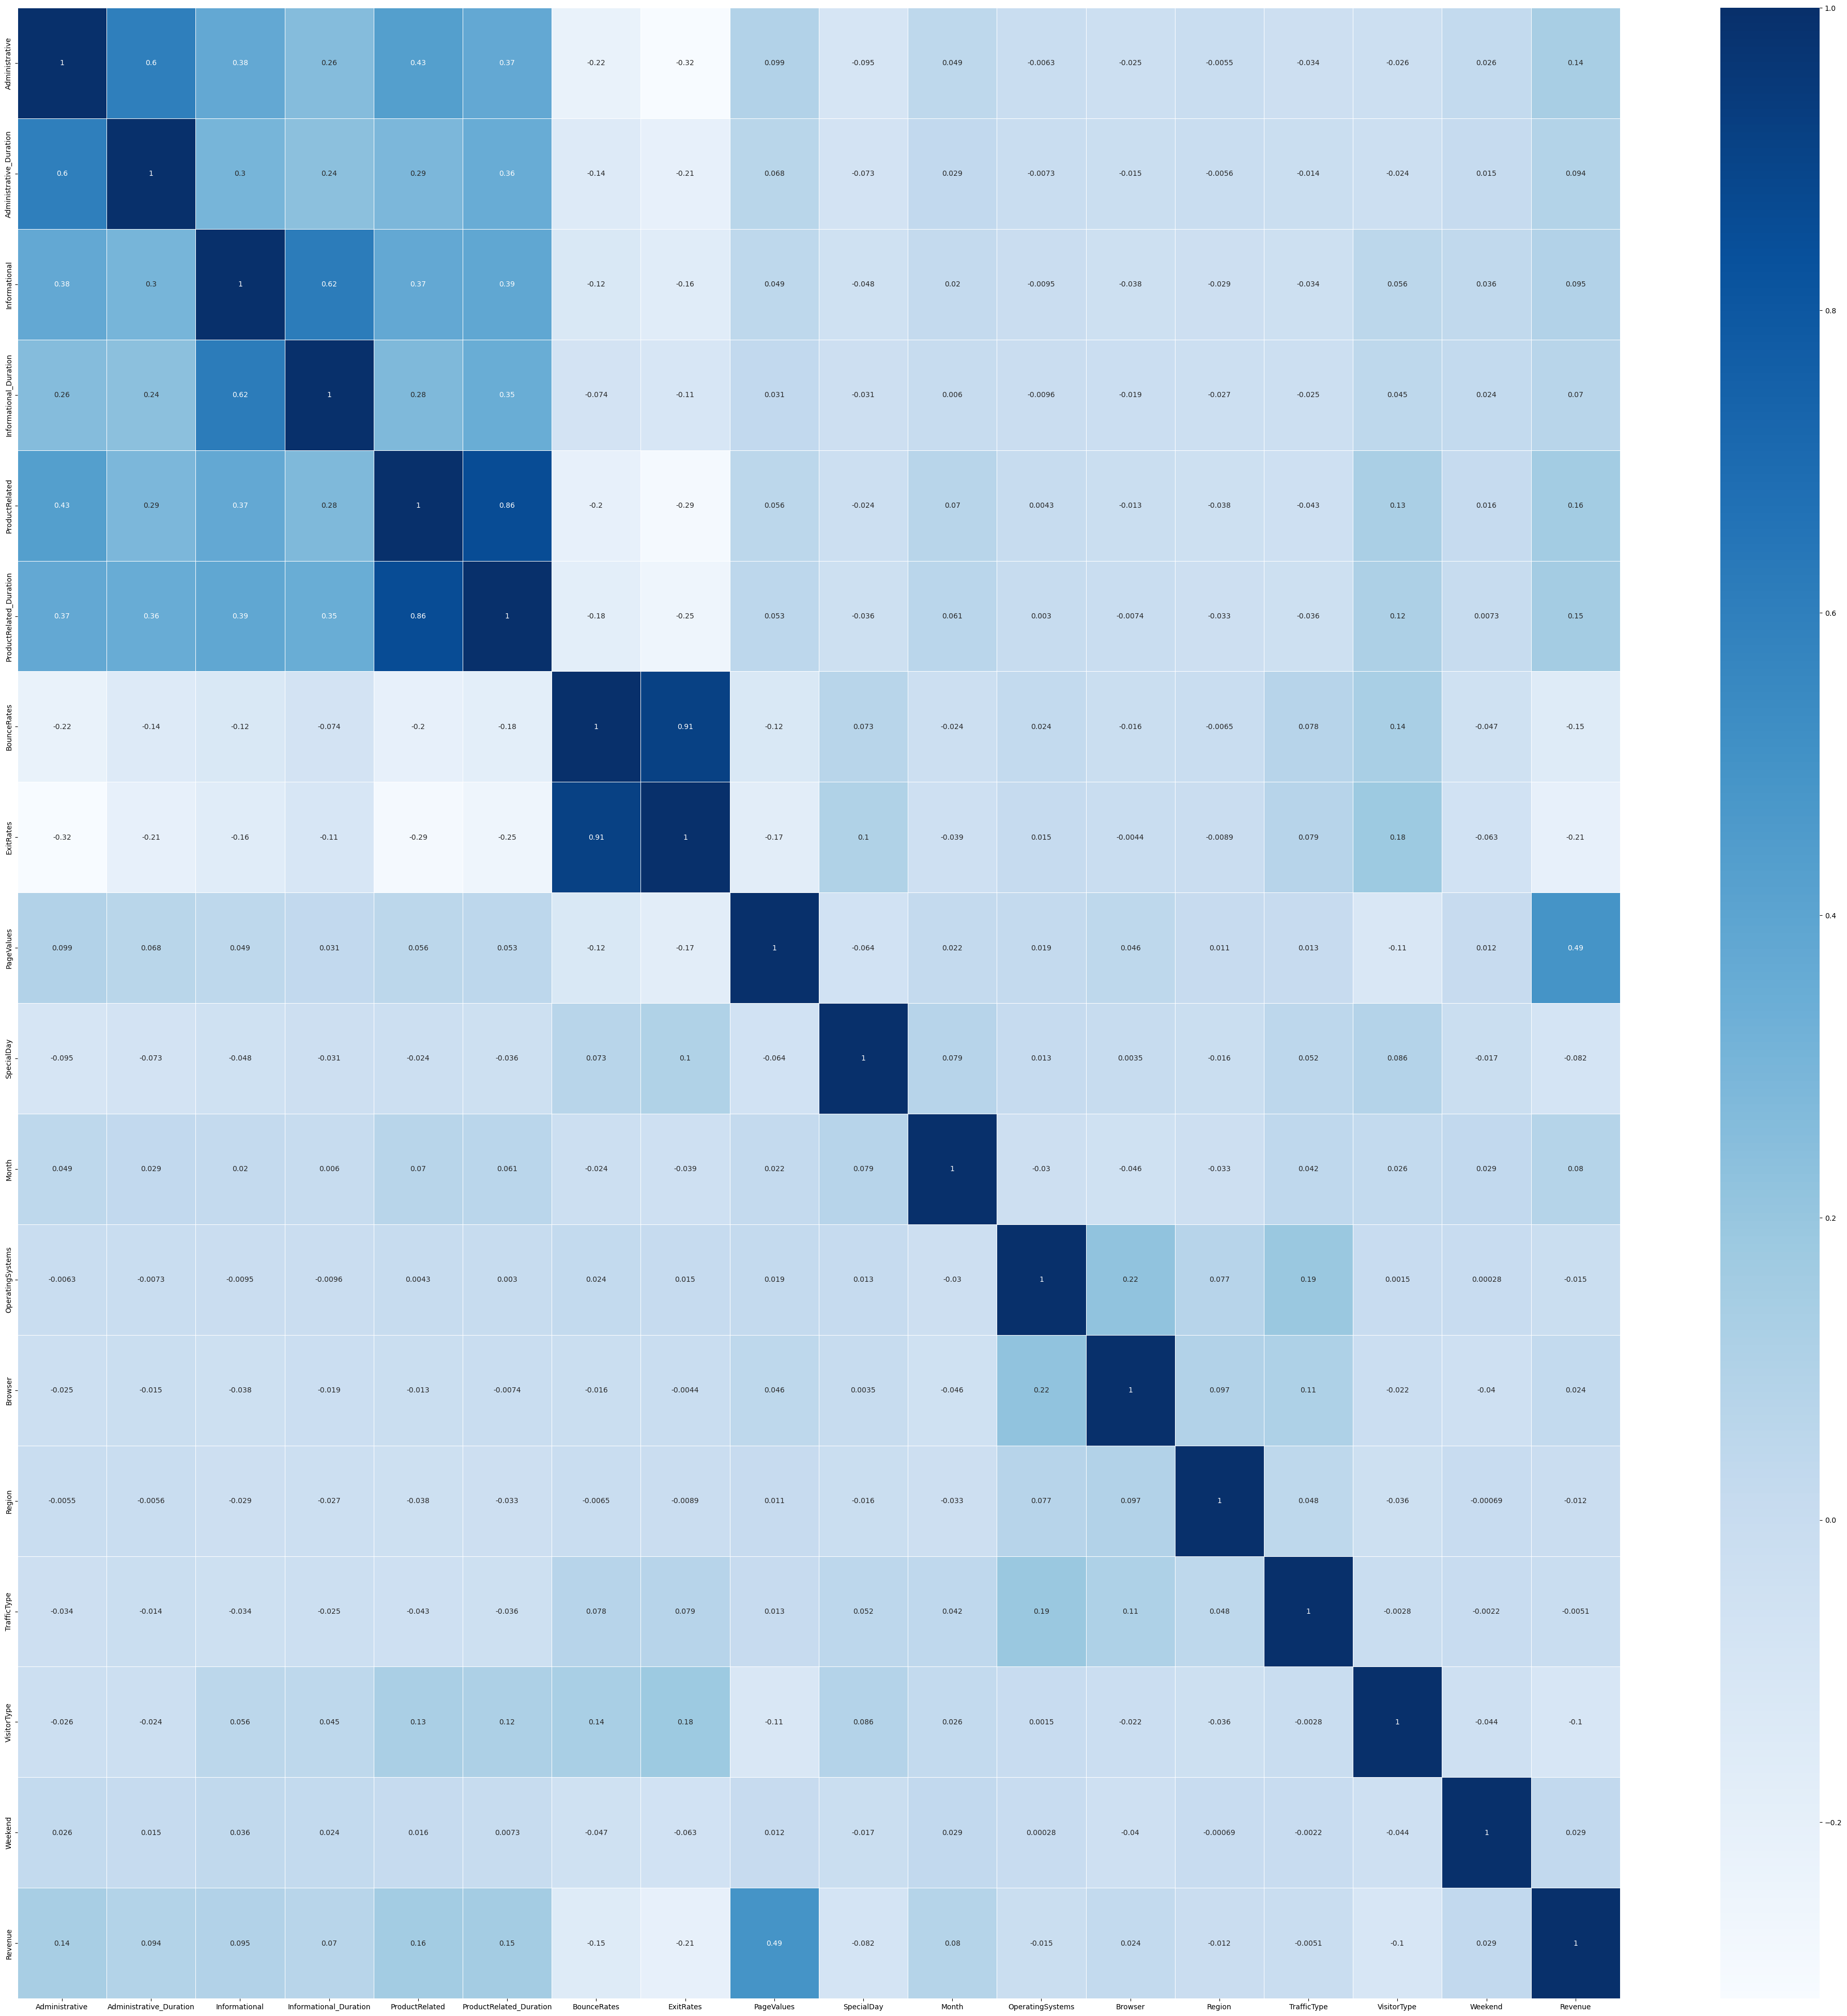

In [221]:
fig, ax = plt.subplots(figsize=(50,50))       
sns.heatmap(df.corr(),cmap='Blues',annot=True,linewidth=0.5,ax=ax)

In [222]:
x=df.iloc[:,0:17]
y=df.iloc[:,-1:]

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2,shuffle=True,random_state=42)

In [225]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((9864, 17), (9864, 1), (2466, 17), (2466, 1))

In [226]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [227]:
scaling=['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues']
for j in scaling:
    x_train[j]=scaler.fit_transform(x_train[[j]])
    x_test[j]=scaler.transform(x_test[[j]])

In [228]:
import tensorflow as tf

In [229]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=18,activation='relu'),
    tf.keras.layers.Dense(units=9,activation='relu'),
    tf.keras.layers.Dense(units=18,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
    
])

In [230]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [231]:
model.fit(x_train,y_train,batch_size=32,epochs=20)

Epoch 1/20
309/309 [==============================] - 2s 2ms/step - loss: 0.4602 - accuracy: 0.8347
Epoch 2/20
309/309 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8482
Epoch 3/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3813 - accuracy: 0.8487
Epoch 4/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.8552
Epoch 5/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8643
Epoch 6/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3194 - accuracy: 0.8724
Epoch 7/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.8763
Epoch 8/20
309/309 [==============================] - 1s 2ms/step - loss: 0.3028 - accuracy: 0.8795
Epoch 9/20
309/309 [==============================] - 1s 2ms/step - loss: 0.2991 - accuracy: 0.8837
Epoch 10/20
309/309 [==============================] - 1s 2ms/step - loss: 0.2930 - accuracy: 0.8862

In [232]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

78/78 [==============================] - 0s 1ms/step


In [233]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [234]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8815896188158961